In [49]:
import sys
sys.path.append('../')

In [50]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [51]:
num_qubits = 2

In [52]:
def init_state():
    pass 

In [53]:
num_layers = 4
var_state_class = ZGR_ansatz(num_qubits, num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 800x300 with 1 Axes>, <Axes: >)

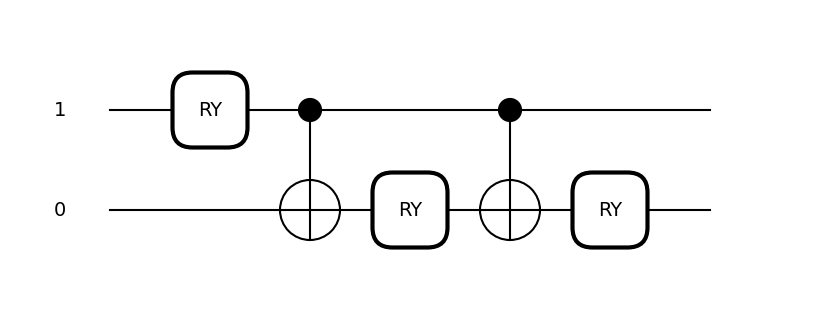

In [54]:
qml.draw_mpl( var_state )( num_params*[0] )

In [55]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state
                    )

In [56]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([ 1.44412803,  1.66397558, 12.55579391, 12.78007855])

In [57]:
params_init = np.random.randn( num_params )

params_ground, energies_ground = varqft.run( params_init )

Step = 0,  Energy = 9.55182457
Step = 5,  Energy = 2.79357672
Step = 10,  Energy = 2.08074951
Step = 15,  Energy = 1.54511750
Step = 20,  Energy = 1.69402528
Step = 25,  Energy = 1.65352011
Step = 30,  Energy = 1.63093781
Step = 35,  Energy = 1.60525095
Step = 40,  Energy = 1.57772374
Step = 45,  Energy = 1.55490816
Step = 50,  Energy = 1.53427219
Step = 55,  Energy = 1.50185263
Step = 60,  Energy = 1.47658610
Step = 65,  Energy = 1.46339154
Step = 70,  Energy = 1.45317888
Step = 75,  Energy = 1.44531369


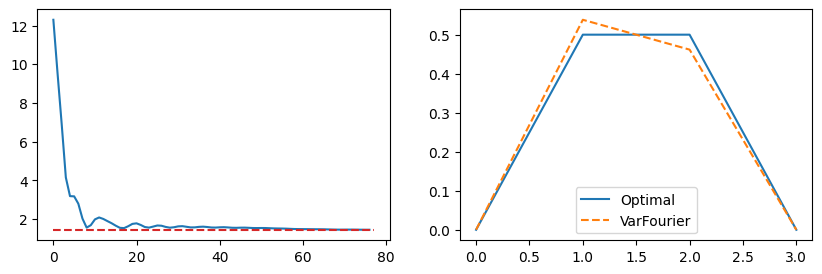

In [58]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [59]:
varqft = VarFourier( num_qubits, 
                    lambda x : x**2/2, 
                    lambda p : p**2/2, 
                    device, 
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [60]:
params_init = np.random.randn( num_params )

params_excited, energies_excited = varqft.run( params_init )

c:\Users\lucia\miniconda3\envs\pennylane\Lib\site-packages\pennylane\math\utils.py:227: UserWarning: Contains tensors of types {'jax', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Step = 0,  Energy = 10.26431465
Step = 5,  Energy = 10.20663452
Step = 10,  Energy = 11.50583267
Step = 15,  Energy = 9.00799561
Step = 20,  Energy = 7.72090292
Step = 25,  Energy = 3.54028511
Step = 30,  Energy = 2.46772289
Step = 35,  Energy = 2.35269475
Step = 40,  Energy = 2.13631582
Step = 45,  Energy = 2.16748190
Step = 50,  Energy = 1.81624830
Step = 55,  Energy = 1.73225403
Step = 60,  Energy = 1.81996584
Step = 65,  Energy = 1.68322635
Step = 70,  Energy = 1.69518697
Step = 75,  Energy = 1.67264330
Step = 80,  Energy = 1.69278443
Step = 85,  Energy = 1.66415083
Step = 90,  Energy = 1.66432357
Step = 95,  Energy = 1.67543685
Step = 100,  Energy = 1.66521072


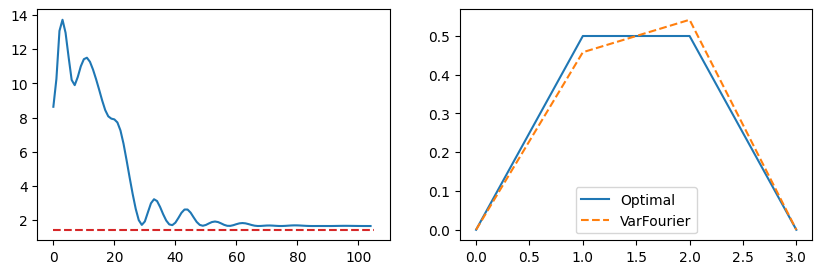

In [61]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [62]:
abs(np.vdot( ground_state, vec ))**2

0.9984583483757525

In [63]:
abs(np.vdot( ground_state, excited_state ))**2 

1.294338524560068e-05

In [64]:
abs(np.vdot( excited_state, vec2 ))**2

0.9982414864012177